In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ufood = pd.read_csv(r'C:\Users\maxim\OneDrive\Documents\FIU\u_food_marketing.csv')
pd.set_option('display.max.columns',40)
pd.set_option('display.max.rows',500)

In [7]:
bins = [1730, 39065, 76400, 113734] 
labels = ['Low', 'Mid', 'High']
ufood['bins'] = pd.qcut(ufood['Income'], 3, labels= ['Low', 'Mid', 'High'])
ufood['bins'] = pd.cut(ufood['Income'], bins=bins, labels=labels, right=False)

In [324]:
accepted_promotions = ufood[ufood['AcceptedCmpOverall']>=1].groupby('bins')['AcceptedCmpOverall'].count().reset_index()

C:\Users\maxim\AppData\Local\Temp\ipykernel_27412\3024555873.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_promotions = ufood[ufood['AcceptedCmpOverall']>=1].groupby('bins')['AcceptedCmpOverall'].count().reset_index()


[]

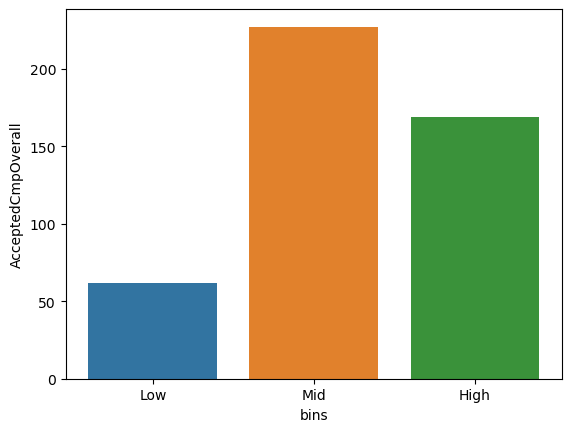

In [326]:
sns.barplot(accepted_promotions, y = 'AcceptedCmpOverall', x = 'bins', hue = 'bins')
plt.plot()

**One of the most important group that we should focus on is the mid level in terms of income ranging from 39000 and 76400. Definitively avoid the low income group**

In [13]:
bins2 = [20, 30, 40, 50, 60, 70, 80, 90] 
labels2 = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80','80-90']  
ufood['bins2'] = pd.cut(ufood['Age'], bins=bins2, labels=labels2, right=False)

In [320]:
accepted_promotions_age = ufood[ufood['AcceptedCmpOverall']>=1].groupby('bins2')['AcceptedCmpOverall'].count().reset_index()
accepted_promotions_age

C:\Users\maxim\AppData\Local\Temp\ipykernel_27412\2288212075.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_promotions_age = ufood[ufood['AcceptedCmpOverall']>=1].groupby('bins2')['AcceptedCmpOverall'].count().reset_index()


,bins2,AcceptedCmpOverall
0,20-30,14
1,30-40,79
2,40-50,113
3,50-60,112
4,60-70,98
5,70-80,42
6,80-90,0


[]

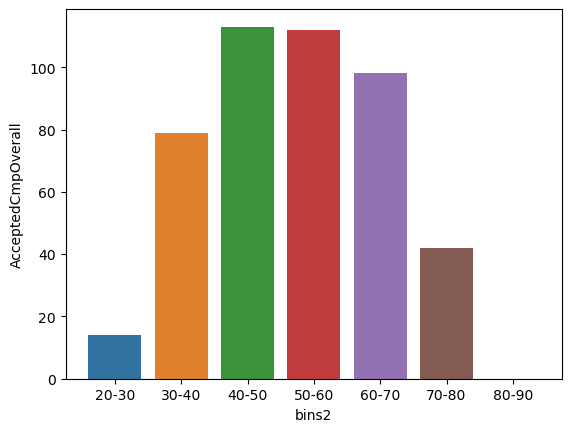

In [322]:
sns.barplot(accepted_promotions_age, y = 'AcceptedCmpOverall', x = 'bins2', hue = 'bins2')
plt.plot()

**the majority of people who accepted at least one campaign are between 40 and 70 years old**

In [ ]:
ufood['proportion'] = (ufood['MntRegularProds']/ufood['MntTotal'])*100
proportion = ufood[ufood['proportion']>0]

In [21]:
bins3 = [0, 25, 50, 75, 100] 
labels3 = ['0-24', '25-50', '50-74', '75-100']  
ufood['bins3'] = pd.cut(ufood['proportion'], bins=bins3, labels=labels3, right=False)

In [23]:
accepted_promotions_proportion = ufood.groupby('bins3')['AcceptedCmpOverall'].count().reset_index()

C:\Users\maxim\AppData\Local\Temp\ipykernel_27412\2868255306.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  accepted_promotions_proportion = ufood.groupby('bins3')['AcceptedCmpOverall'].count().reset_index()


Text(0.5, 1.0, 'higher proportion between RP/RT = more accepted campaings')

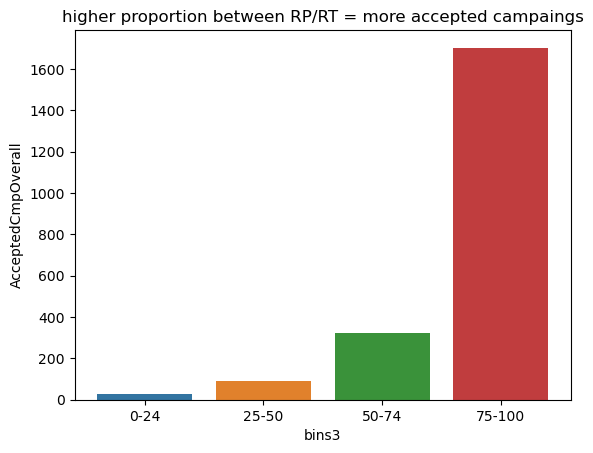

In [25]:
sns.barplot(accepted_promotions_proportion, y = 'AcceptedCmpOverall', x = 'bins3', hue = 'bins3')
plt.plot()
plt.title('higher proportion between RP/RT = more accepted campaings')

**the RP/RT is described as follows: (AMOUNT OF REGULAR PRODUCTS)/(AMOUNT OF TOTAL PRODUCTS) there is strong correlation between people of accepted campaigns and have a higher prortion. Why? One of the reasons is the customer loyalty, I belive that lower proportions is defined by people who use ufood only to buy a particular luxury item, and they are customers of another food group. This is why we should avoid the group of people who have an RP/RT proportion lower than 75**

In [343]:
cmp_dis = ufood[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmpOverall']]
cmp_dis = cmp_dis[cmp_dis['AcceptedCmpOverall'] == 1]
two_cmp = cmp_dis.agg(stage1 = ('AcceptedCmp1','sum'), stage2 = ('AcceptedCmp2','sum'), stage3 = ('AcceptedCmp3','sum'), 
                      stage4 = ('AcceptedCmp4','sum'),
          stage5 = ('AcceptedCmp5','sum'), cmp_count_total = ('AcceptedCmpOverall','sum'))

In [139]:
count_cmp = np.diag(two_cmp)
two_cmp['count']= count_cmp
result_cmp = two_cmp[two_cmp['count'] < 200]
result_cmp = result_cmp.reset_index(names = 'stages')
result_cmp_transpose = two_cmp[['count']].transpose()
result_cmp_tranpose

,stage1,stage2,stage3,stage4,stage5,cmp_count_total
count,52.0,1.0,129.0,83.0,57.0,322.0


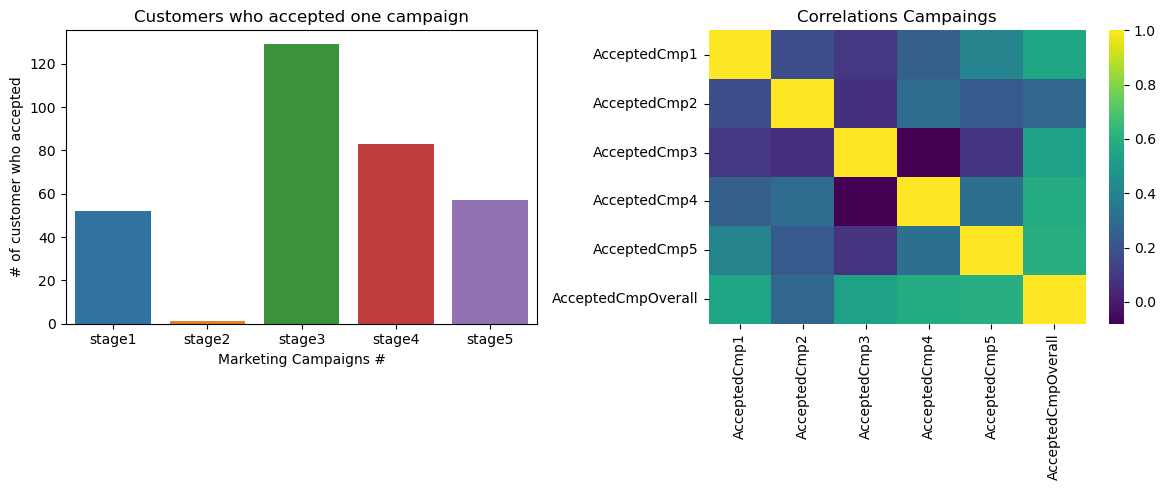

In [189]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas

# Gráfica 1
sns.barplot(result_cmp, ax= axs[0] ,y = 'count', x = 'stages', hue = 'stages')
axs[0].set_title('Customers who accepted one campaign')
axs[0].set_xlabel('Marketing Campaigns #')
axs[0].set_ylabel('# of customer who accepted')

# Gráfica 2
sns.heatmap(effect.corr(method = 'spearman'), ax = axs[1],cmap='viridis')
axs[1].set_title('Correlations Campaings')


# Ajustar el layout
plt.tight_layout()
plt.show()

**83% of people who accepted the campaign did it after the third stage of it. We should adopt the same strategies applied for stage 3,4 and 5, and avoid stage 2's strategies. This is in terms of users who accepted only one campaign across the five of them. It was done this way to see the real impact of having multiple campaign**

<Axes: xlabel='Kidhome', ylabel='AcceptedCmpOverall'>

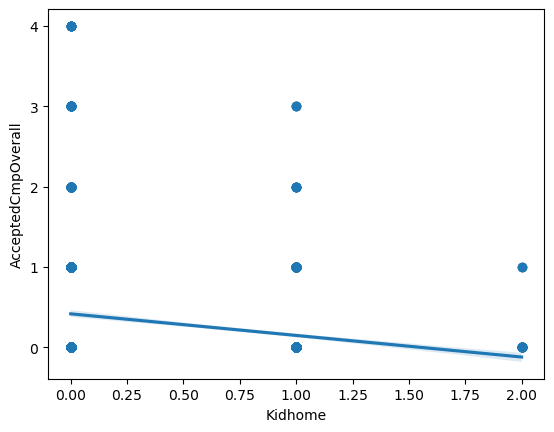

In [289]:
sns.regplot(ufood,y = 'AcceptedCmpOverall', x = 'Kidhome')

**As an extra filter for marketing campaigns we should focus on people who do not have kids at home since they tend to accept more our promotions**

<h2 style="color: blue;">General Recommendations to Increase Marketing Campaigns Efficiency:</h2>
<p style="font-size: 25px;">1. Avoid people with an income lower than 39000</p>
<p style="font-size: 25px;">2. Focus on ages between 40 and 70 years old</p>
<p style="font-size: 25px;">3. Aim for an RP/RT proportion greater than 75</p>
<p style="font-size: 25px;">4. There is a great impact on having multiple marketing campaigns. Try to use the strategies of the last three of them in the next camapign in order to reduce the add cost of having multiple of camapaigns</p>





